In [11]:
from skimage.filters import threshold_sauvola
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.color import rgb2gray, label2rgb
from skimage.morphology import remove_small_objects
from skimage.filters import gaussian
from skimage.filters import threshold_local
from skimage.morphology import remove_small_holes




C:\Users\uqhkrek\AppData\Local\Temp\ipykernel_16340\1862855819.py:13: UserWarning: segmentation.tiff is a low contrast image
  io.imsave("segmentation.tiff", unholed*255)


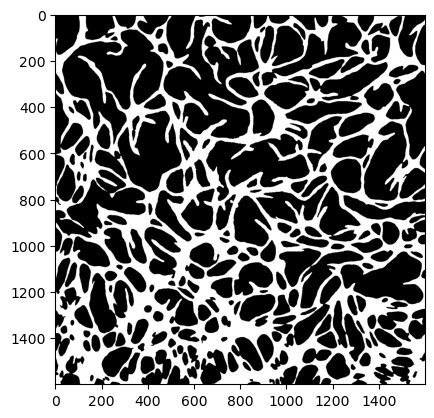

In [31]:
PATH = "F://F2//MyExperiment_Wellc6_F2_000521.tif"
img = io.imread(PATH)
imgGrey = img[:,:,1]
from skimage.exposure import adjust_gamma
adapted_hist = adjust_gamma(imgGrey)
blur = gaussian(adapted_hist, sigma=2.5)
thresh = threshold_local(blur , block_size = 1501) 
plt.imshow(blur)
bw = blur > thresh
ensmallend = remove_small_objects(bw, min_size = 1000, connectivity=4)
unholed = remove_small_holes(ensmallend, area_threshold = 300)
plt.imshow(unholed, cmap='gray')
io.imsave("segmentation.tiff", unholed*255)



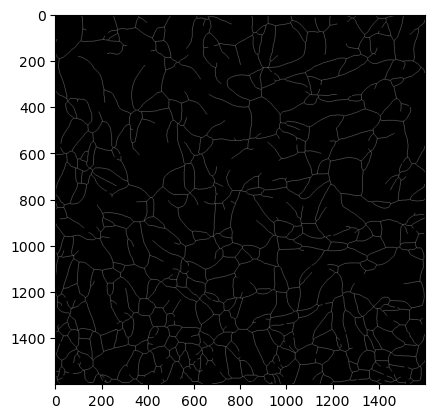

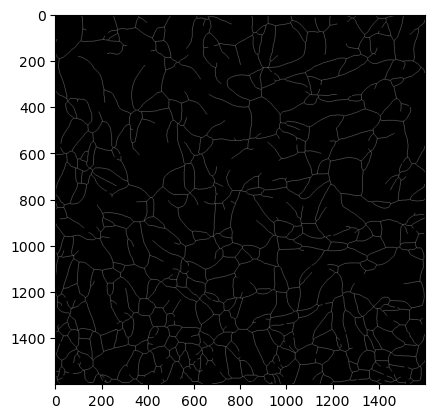

In [45]:
import plantcv
from plantcv.plantcv.morphology import skeletonize
plantcv.plantcv.params.debug = "plot"
plantcv.plantcv.params.line_thickness = 3 
skel = skeletonize(unholed)
plt.imshow(skel, cmap='gray')


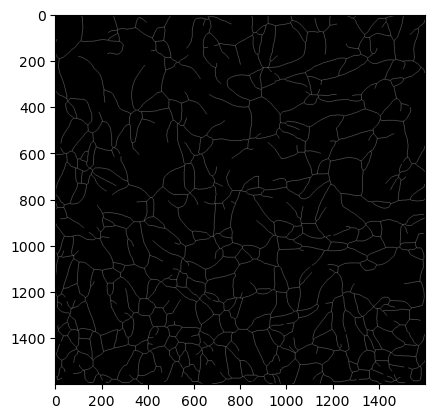

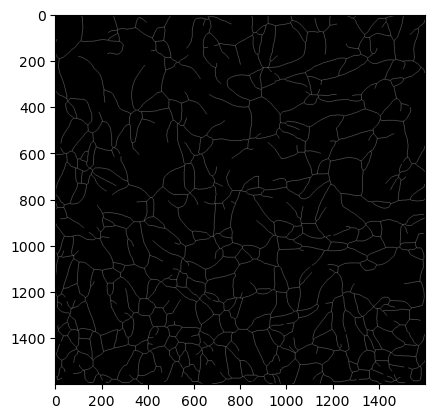

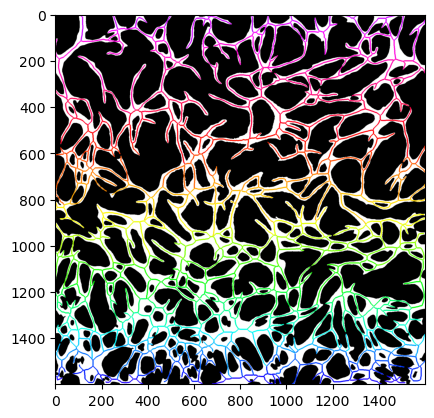

In [51]:
from plantcv.plantcv.morphology import prune
import numpy as np

pruned_skel, img, objects = prune(skel_img=skel, size=30, mask=unholed.astype(np.uint8)*255)

In [36]:
io.imsave("skel.tiff",skel)
io.imsave("pruned_skeleton.tiff", pruned_skel)